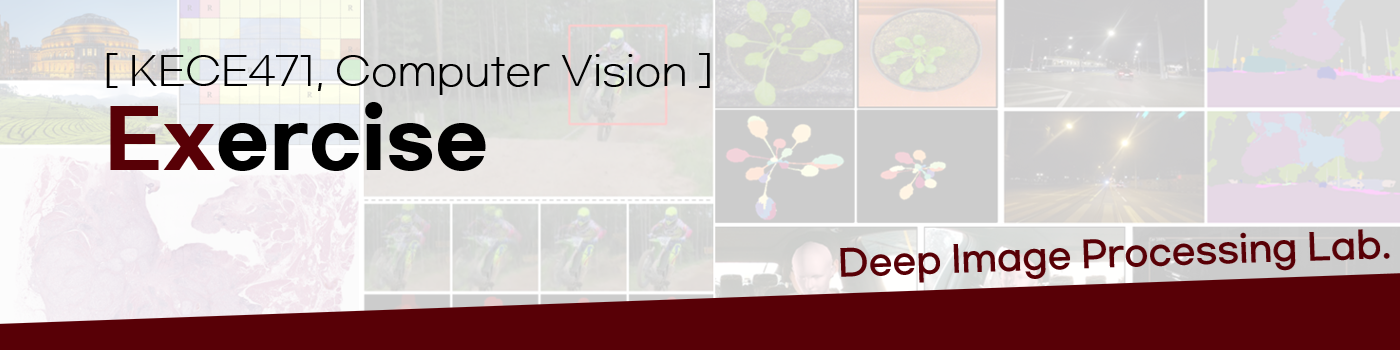

**Import the necessary packages for completing this exercise**

In [251]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from shapely.geometry import Polygon, Point

# **Exercise 1. Create a python class for a calculator that computes Precision and Recall.**
---

## **Problem Statement: Precision and Recall Calculation**  

### **1. Input**  
   The program takes two **1D lists** as input:  
   * `actual_labels`: A list containing the ground truth labels (binary values: `0` or `1`).  
   * `predicted_labels`: A list containing the predicted values (binary values: `0` or `1`).  

   Both lists should have the **same length**, where each index represents a corresponding data point.  

### **2. Output**  
   The program computes and returns the following evaluation metrics:  
   * **Recall**: Measures the ability to correctly identify all relevant instances.  
     $$
     Recall = \frac{TP}{TP + FN}
     $$  
     - High recall indicates that most actual positive cases were correctly predicted.  

   * **Precision**: Measures the accuracy of positive predictions.  
     $$
     Precision = \frac{TP}{TP + FP}
     $$  
     - High precision means that when the model predicts positive, it is usually correct.  

   The output will be displayed in a readable format, showing **both Recall and Precision values** rounded to four decimal places.  


1. **Generate Test Data**  
   * `actual_labels`: Ground truth data, initialized as `[1, 0, 1, 1, 0, 1, 0, 0, 1, 1]`.  
   * `predicted_labels`: Predicted data, initialized as `[1, 1, 1, 0, 0, 1, 0, 0, 1, 0]`.  


In [252]:
actual_labels = None
predicted_labels = None

# =========================<your code starts here>========================
actual_labels = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
predicted_labels = [1, 1, 1, 0, 0, 1, 0, 0, 1, 0]
# =========================<your code ends here>==========================

2. **Calculate True Positive (TP)**  
   * Count the number of cases where the actual label is `1` and the predicted label is also `1`.  


In [253]:
tp = None

# =========================<your code starts here>========================
tp = 0
for a, p in zip(actual_labels, predicted_labels):
    if a == 1 and p == 1:  
        tp += 1 
# =========================<your code ends here>==========================

print("True Positive : ", tp)

True Positive :  4


3. **Calculate False Positive (FP)**  
   * Count the number of cases where the actual label is `0`, but the predicted label is `1`.  


In [254]:
fp = None

# =========================<your code starts here>========================
fp = 0
for a, p in zip(actual_labels, predicted_labels):
    if a == 0 and p == 1:  
        fp += 1  
# =========================<your code ends here>==========================

print("False Positive : ", fp)


False Positive :  1


4. **Calculate False Negative (FN)**  
   * Count the number of cases where the actual label is `1`, but the predicted label is `0`.  


In [255]:
fn = None

# =========================<your code starts here>========================
fn = 0
for a, p in zip(actual_labels, predicted_labels):
    if a == 1 and p == 0: 
        fn += 1
# =========================<your code ends here>==========================

print("False Negative : ", fn)


False Negative :  2


5. **Calculate True Negative (TN)**  
   * Count the number of cases where the actual label is `0` and the predicted label is also `0`.  


In [256]:
tn = None

# =========================<your code starts here>========================
tn = 0
for a, p in zip(actual_labels, predicted_labels):
    if a == 0 and p == 0:
        tn += 1 
# =========================<your code ends here>==========================

print("True Negative : ", tn)

True Negative :  3


6. **Calculate Recall**  
   * Recall is calculated using the formula:  

     $$
     Recall = \frac{TP}{TP + FN}
     $$

   * If the denominator $(TP + FN)$ is zero, set recall to `0.0` to avoid division by zero.  


In [257]:
recall = None
# =========================<your code starts here>========================
if (tp + fn) > 0: 
    recall = tp / (tp + fn)
else:
    recall = 0.0  
# =========================<your code ends here>==========================

print("Recall : ", recall)

Recall :  0.6666666666666666


7. **Calculate Precision**  
   * Precision is calculated using the formula:  

     $$
     Precision = \frac{TP}{TP + FP}
     $$

   * If the denominator $(TP + FP)$ is zero, set precision to `0.0` to avoid division by zero.  


In [258]:
precision = None

# =========================<your code starts here>========================
if (tp + fp) > 0:  
    precision = tp / (tp + fp)
else:
    precision = 0.0  
# =========================<your code ends here>==========================

print("Precision : ", precision)

Precision :  0.8


8. **Create the `PrecisionAndRecallCalculator` Class**


In [259]:
class PrecisionAndRecallCalculator:
   
    def __init__(self):
        pass

    # =========================<your code starts here>========================

    def calc_tp(self, actual, predicted):
        """Calculate True Positives (TP)"""
        tp = 0
        for a, p in zip(actual, predicted):
            if a == 1 and p == 1:
                tp += 1
        return tp

    def calc_tn(self, actual, predicted):
        """Calculate True Negatives (TN)"""
        tn = 0
        for a, p in zip(actual, predicted):
            if a == 0 and p == 0:
                tn += 1
        return tn

    def calc_fp(self, actual, predicted):
        """Calculate False Positives (FP)"""
        fp = 0
        for a, p in zip(actual, predicted):
            if a == 0 and p == 1:
                fp += 1
        return fp

    def calc_fn(self, actual, predicted):
        """Calculate False Negatives (FN)"""
        fn = 0
        for a, p in zip(actual, predicted):
            if a == 1 and p == 0:
                fn += 1
        return fn

    def calc_recall(self, actual, predicted):
        """Calculate Recall"""
        tp = self.calc_tp(actual, predicted)
        fn = self.calc_fn(actual, predicted)
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        return recall

    def calc_precision(self, actual, predicted):
        """Calculate Precision"""
        tp = self.calc_tp(actual, predicted)
        fp = self.calc_fp(actual, predicted)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        return precision

    # =========================<your code ends here>==========================

    def calculate(self, actual, predicted):
        recall = self.calc_recall(actual, predicted)
        precision = self.calc_precision(actual, predicted)

        return recall, precision


9. **Compute Precision and Recall Using `PrecisionAndRecallCalculator`**  

   * Create an instance of `PrecisionAndRecallCalculator` with `actual_labels` and `predicted_labels`.  

   * Call the `calculate()` method to obtain **Recall** and **Precision** values.  

   * Print the results in a readable format.  


In [260]:
prc = PrecisionAndRecallCalculator()
recall = None
precision = None

# =========================<your code starts here>========================
recall, precision = prc.calculate(actual_labels, predicted_labels)
# =========================<your code ends here>==========================

print(f"Recall : {recall}")
print(f"Precision : {precision}")

Recall : 0.6666666666666666
Precision : 0.8


<br><br>

**10. Practical Application**

Perform segmentation on images from the COCO dataset using OpenCV. After segmentation, compare the results' accuracy against the COCO dataset labels in terms of **Precision** and **Recall**.

### Steps:
1. **Load COCO Image**: Load an image from the COCO dataset using OpenCV.

2. **Perform Segmentation**: Use OpenCV or other methods to segment the image.

3. **Extract COCO Labels**: Obtain the segmentation labels from the COCO dataset.

4. **Calculate Precision and Recall**: Use the **PrecisionAndRecallCalculator** class to calculate **Precision** and **Recall** by comparing the segmentation result with the COCO ground truth labels.

5. **Comparison**: Analyze and compare the **Precision** and **Recall** values to assess the accuracy of the segmentation method.  


**10.0. Download target image**

In [261]:
image_url = "http://images.cocodataset.org/val2017/000000005477.jpg"

response = requests.get(image_url)

if response.status_code == 200:
    with open('000000005477.jpg', 'wb') as file:
        file.write(response.content)
    print("Image downloaded successfully!")
else:
    print("Failed to download the image. Status code:", response.status_code)

Image downloaded successfully!


**10.1. Generate Ground Truth Segmentation Map Using the COCO Dataset**

Run the following code to obtain the segmentation map.

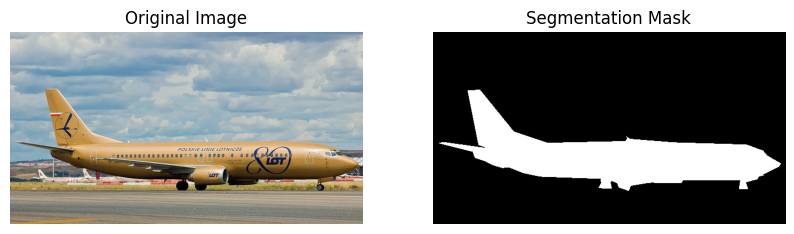

True

In [262]:
image_path = '000000005477.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

segmentation = [[599.75,261.36,592.67,262.14,589.53,263.72,587.95,267.65,566.73,273.15,570.66,284.94,568.3,285.72,554.16,285.72,556.51,269.22,453.54,269.22,449.61,274.72,395.38,273.93,387.52,274.72,358.43,279.44,354.5,288.87,336.42,282.58,333.28,274.72,323.85,270.79,321.49,273.15,323.85,284.15,315.2,284.94,299.48,283.37,304.2,273.93,303.41,266.86,194.15,262.93,163.5,256.64,137.56,246.42,124.98,247.21,108.47,242.49,94.32,235.42,75.46,229.13,71.53,218.13,9.43,202.4,17.29,200.05,96.68,211.05,81.75,205.55,62.1,106.51,84.89,105.72,146.2,181.18,207.51,201.62,348.21,198.47,351.36,193.76,349.79,189.83,356.86,194.54,436.25,200.83,568.3,204.76,598.17,215.77,605.25,224.41,631.19,239.35,626.47,244.85,597.39,259.78]]
segmentation = np.array(segmentation[0]).reshape((-1, 2))

mask = np.zeros(image.shape[:2], dtype=np.uint8)

polygon = Polygon(segmentation)

for y in range(mask.shape[0]):
    for x in range(mask.shape[1]):
        if polygon.contains(Point(x, y)):
            mask[y, x] = 1

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.show()

cv2.imwrite('segmentation_label_coco.png', mask * 255) 


**10.2. Generate Inference Segmentation Map Using OpenCV's Color Picking**

Run the following code to obtain the segmentation map.

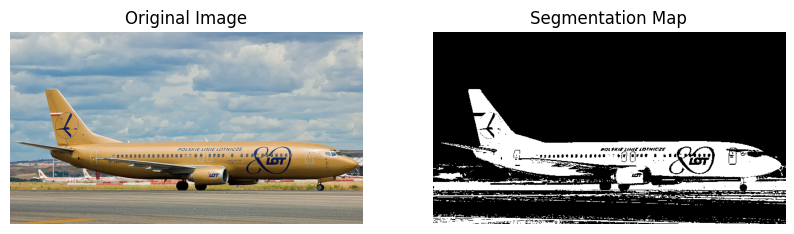

In [263]:
image_path = '000000005477.jpg'
image = cv2.imread(image_path)

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_color = np.array([10, 50, 50]) 
upper_color = np.array([40, 255, 255]) 

mask = cv2.inRange(image_hsv, lower_color, upper_color)

segmentation_map = np.zeros_like(mask)
segmentation_map[mask > 0] = 1 

segmentation_map_path = 'segmentation_map_opencv.png'
cv2.imwrite(segmentation_map_path, segmentation_map * 255) 

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmentation_map, cmap='gray')
plt.title('Segmentation Map')
plt.axis('off')

plt.show()


**10.3. Modify the `PrecisionAndRecallCalculator` Class for the Task**  

- Change the input format of the `PrecisionAndRecallCalculator` class from two lists to two **`numpy.ndarray`** objects.

- The class should now accept **segmentation maps** as **`numpy.ndarray`** for both **actual** and **predicted** maps.

- Ensure that the computation of **Precision** and **Recall** works with **binary segmentation maps** (where pixels belonging to the object are `1` and others are `0`).

In [264]:
class PrecisionAndRecallCalculator_segmentation_map:
   
    def __init__(self):
        pass

    # =========================<your code starts here>========================

    def calc_tp(self, actual, predicted):
        """Calculate True Positives (TP)"""
        tp = np.sum((actual == 255) & (predicted == 255))
        return tp

    def calc_tn(self, actual, predicted):
        """Calculate True Negatives (TN)"""
        tn= np.sum((actual == 0) & (predicted == 0))
        return tn

    def calc_fp(self, actual, predicted):
        """Calculate False Positives (FP)"""
        fp= np.sum((actual == 0) & (predicted == 255))
        return fp

    def calc_fn(self, actual, predicted):
        """Calculate False Negatives (FN)"""
        fn = np.sum((actual == 255) & (predicted == 0))
        return fn
    
    def calc_recall(self, actual, predicted):
        """Calculate Recall"""
        tp = self.calc_tp(actual, predicted)
        fn = self.calc_fn(actual, predicted)
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        return recall

    def calc_precision(self, actual, predicted):
        """Calculate Precision"""
        tp = self.calc_tp(actual, predicted)
        fp = self.calc_fp(actual, predicted)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        return precision

    # =========================<your code ends here>==========================

    def calculate(self, actual, predicted):
        recall = self.calc_recall(actual, predicted)
        precision = self.calc_precision(actual, predicted)

        return recall, precision


**10.4. Compute Precision and Recall Using `PrecisionAndRecallCalculator_segmentation_map`**

- Instantiate the modified `PrecisionAndRecallCalculator_segmentation_map` class with the **actual segmentation map** (ground truth) and the **predicted segmentation map** (from inference).

- Use the `calculate()` method to compute **Precision** and **Recall** based on the segmentation maps.

- Display or analyze the resulting **Precision** and **Recall** values to evaluate the accuracy of the segmentation model.

In [265]:
prc = PrecisionAndRecallCalculator_segmentation_map()
recall = None
precision = None

coco_label = cv2.imread("segmentation_label_coco.png", cv2.IMREAD_GRAYSCALE)
opencv_result = cv2.imread("segmentation_map_opencv.png", cv2.IMREAD_GRAYSCALE)

# =========================<your code starts here>========================
recall, precision = prc.calculate(coco_label, opencv_result)
# =========================<your code ends here>==========================

print(f"Recall : {recall}")
print(f"Precision : {precision}")

Recall : 0.7562057830256119
Precision : 0.6467983723038647


<br><br>

# **Exercise 2: Implementing Nearest Neighbor Interpolation**  
---

Nearest neighbor interpolation is a simple image scaling technique that assigns the value of the nearest pixel in the original image to the corresponding position in the resized image. The process consists of the following steps:  

1. **Calculate the Scaling Factors**  
   - Determine the scaling factors for the x-axis and y-axis based on the ratio of the new image size to the original image size.  

2. **Map Query Points**  
   - For each pixel in the enlarged image, determine the corresponding nearest pixel in the original image.  
   - Since the new coordinates may be non-integer values, round them to the nearest integer to find the corresponding pixel in the original image.  

3. **Assign Pixel Values**  
   - Copy the pixel values from the nearest mapped coordinates in the original image to the corresponding locations in the resized image.  

4. **Repeat for All Pixels**  
   - Perform this process for every pixel in the enlarged image until all empty spaces are filled.  


**1. Load `target_lr.png` Using OpenCV**  

To load the image **`target_lr.png`**, provide its file path as an argument to **`cv2.imread()`**.  

Since OpenCV loads images in **BGR format**, but **`matplotlib`** expects **RGB format**, the color channels need to be converted before displaying the image.  

To visualize the image in a Jupyter Notebook, it is recommended to use the **`matplotlib`** package.  


In [266]:
# download images

def save_image_from_url(url, file_name):
    response = requests.get(url)

    if response.status_code == 200:
        with open(file_name, 'wb') as file:
            file.write(response.content)
        print("Image downloaded successfully!")
    else:
        print("Failed to download the image. Status code:", response.status_code)

target_hr_url = "https://github.com/BrawnyClover/DIP_WINTER/blob/main/target_hr.png?raw=true"
target_lr_url = "https://github.com/BrawnyClover/DIP_WINTER/blob/main/target_lr.png?raw=true"
target_sr_url = "https://github.com/BrawnyClover/DIP_WINTER/blob/main/target_sr.png?raw=true"

save_image_from_url(target_hr_url, "target_hr.png")
save_image_from_url(target_lr_url, "target_lr.png")
save_image_from_url(target_sr_url, "target_sr.png")

Image downloaded successfully!
Image downloaded successfully!
Image downloaded successfully!


**Characteristics of Images Loaded with OpenCV**  

1. When an image is loaded using **OpenCV**, it is stored as a **NumPy ndarray**.  
   - The **ndarray** structure is a modified version of the multi-dimensional list, optimized for efficient matrix operations and numerical computations.  

2. **OpenCV stores image channels in the B, G, R (Blue, Green, Red) order**, while **matplotlib assumes the R, G, B order**.  
   - To correctly display the image using **matplotlib**, the channel order must be converted using the **`cv2.cvtColor`** method.  


<class 'numpy.ndarray'>


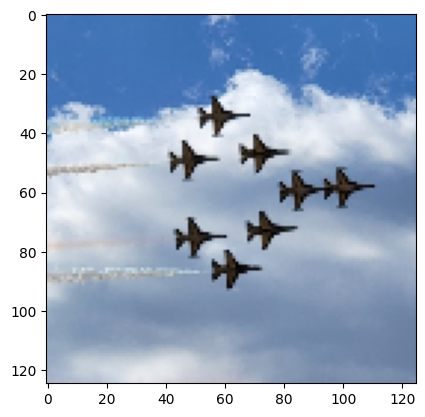

In [ ]:
img_dir = "target_lr.png"
lr_img = None

# =========================<your code starts here>========================
lr_img = cv2.imread(img_dir)
# =========================<your code ends here>==========================

print(type(lr_img))

plt.imshow(cv2.cvtColor(lr_img, cv2.COLOR_BGR2RGB))
plt.show()


**2. Create an Empty `np.ndarray` with a Width and Height 4 Times Larger than the Loaded Image**  

The empty **`np.ndarray`** is created using the **`np.zeros((width, height, channels))`** method.  

- The **width** and **height** are each increased by a factor of **4**, while the number of channels remains **3**.  
- The **B, G, R** channels do not change during this process.  


In [268]:
w, h, c = lr_img.shape
print(f"Original image shape: {w}, {h}, {c}")

# =========================<your code starts here>========================
sr_w, sr_h, sr_c = 4 * w, 4 * h, c
nearest_sr_img = np.zeros((sr_w, sr_h, sr_c), dtype=np.uint8)
# =========================<your code ends here>==========================
print(f"Resized image shape: {nearest_sr_img.shape}")

Original image shape: 125, 125, 3
Resized image shape: (500, 500, 3)


**3. Match Each Pixel in `sr_img` to the Corresponding Pixel in `lr_img`**  

This process is called **Query Point Mapping**.  

- Mathematically, **(𝑥, 𝑦)** represents the **horizontal** and **vertical** coordinates.  
  - However, in **array indexing**, the first coordinate refers to the **vertical axis** (row), followed by the **horizontal axis** (column).  
  - Therefore, it is represented as **(𝑦, 𝑥)** in array operations.  

- Mathematically, **(0,0)** refers to the **bottom-left corner** of an image.  
  - However, in an **array representation**, **(0,0)** corresponds to the **top-left corner** of the image.  


In [269]:
# =========================<your code starts here>========================
s_x = w / sr_w
s_y = h / sr_h

query_point = np.zeros((sr_w, sr_h, 2), dtype=int)

# Note that the notation is (y, x) instead of (x, y)
for y in range(sr_h):
    for x in range(sr_w):
        q_x = round(x * s_x)
        q_y = round(y * s_y)
        q_x = min(max(0, q_x), w - 1)  # Ensure the mapped x-coordinate is within [0, w-1]
        q_y = min(max(0, q_y), h - 1)  # Ensure the mapped y-coordinate is within [0, h-1]
        query_point[x, y] = (q_x, q_y)

# =========================<your code ends here>==========================

**4. Assign Pixel Values from `lr_img` to `sr_img` Using `query_point`**  

- Using the **query points** mapped in the previous step, assign the pixel values from **`lr_img`** to the corresponding locations in **`sr_img`**.  
- For each pixel in **`sr_img`**, find the nearest corresponding pixel in **`lr_img`** and copy its value.  
- Repeat this process for all pixels in **`sr_img`** to complete the interpolation.  


In [270]:
# =========================<your code starts here>========================
for x in range(sr_w):
    for y in range(sr_h):
        
        nearest_sr_img[x, y] = lr_img[query_point[x, y][0], query_point[x, y][1]]
# =========================<your code ends here>==========================

**Visualization**  

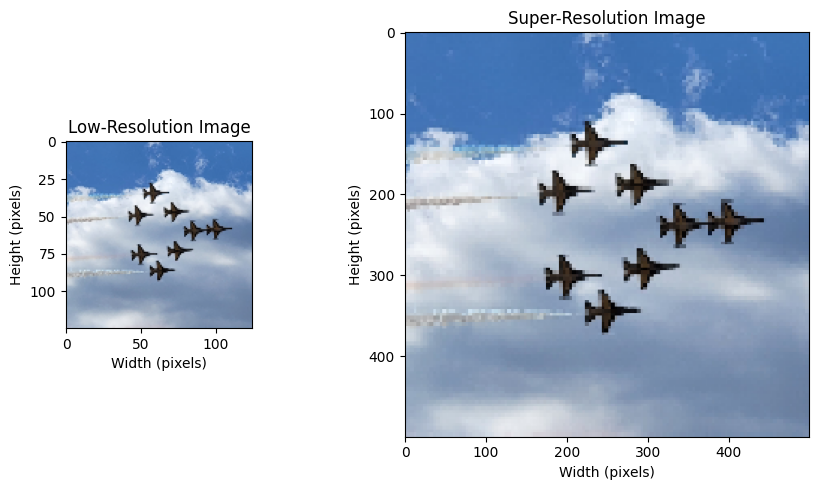

In [271]:
lr_img_height, lr_img_width = h, w
sr_img_height, sr_img_width = sr_h, sr_w

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[lr_img_width, sr_img_width])

ax1 = fig.add_subplot(gs[0])
ax1.imshow(cv2.cvtColor(lr_img, cv2.COLOR_BGR2RGB))
ax1.set_title("Low-Resolution Image")
ax1.set_xlabel("Width (pixels)")
ax1.set_ylabel("Height (pixels)")
ax1.set_aspect('equal')

ax2 = fig.add_subplot(gs[1])
ax2.imshow(cv2.cvtColor(nearest_sr_img, cv2.COLOR_BGR2RGB))
ax2.set_title("Super-Resolution Image")
ax2.set_xlabel("Width (pixels)")
ax2.set_ylabel("Height (pixels)")
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()


<br><br>

# **Exercise 3: Implementing Bilinear Interpolation**  
---
**Bilinear Interpolation Follows These Steps:**  

1. **Calculate the Scaling Ratio**  
   - Determine the scaling ratio between **`lr_img`** and **`sr_img`** for both axes.  

2. **Compute the Corresponding Coordinates**  
   - For each pixel **$(i, j)$** in **`sr_img`**, compute its corresponding coordinate **$(x, y)$** in **`lr_img`**.  
   - The coordinates **$x, y$** are real numbers (e.g., **$(2.5, 3.7)$**).  

3. **Identify the Surrounding Pixels**  
   - Determine the four integer coordinates that enclose **$(x, y)$** in **`lr_img`**.  
   - Find the **top-left** pixel **$(x_0, y_0)$** and the **bottom-right** pixel **$(x_0+1, y_0+1)$**.  

4. **Perform Horizontal Interpolation (Top Edge)**  
   - Interpolate between the **top-left** **$(x_0, y_0)$** and **top-right** **$(x_1, y_0)$** pixels.  
   - Compute the pixel value at the virtual coordinate **$(x_k, y_0)$**.  

5. **Perform Horizontal Interpolation (Bottom Edge)**  
   - Interpolate between the **bottom-left** **$(x_0, y_1)$** and **bottom-right** **$(x_1, y_1)$** pixels.  
   - Compute the pixel value at the virtual coordinate **$(x_k, y_1)$**.  

6. **Perform Vertical Interpolation**  
   - Interpolate between the computed values at **$(x_k, y_0)$** and **$(x_k, y_1)$**.  
   - Obtain the final pixel value at **$(x, y)$**.  

7. **Repeat for All Pixels**  
   - Apply steps **2 to 6** for all pixels in **`sr_img`** to generate the interpolated image.  



**1. Load the Image Using OpenCV**  

- Use **`cv2.imread()`** to load the image from the specified file path.  

- Since OpenCV loads images in **BGR format**, but **`matplotlib`** expects **RGB format**, convert the color channels using **`cv2.cvtColor()`** before displaying the image. 
 
- To visualize the image in a Jupyter Notebook, use the **`matplotlib`** package.  


**Visualization**  

<class 'numpy.ndarray'>


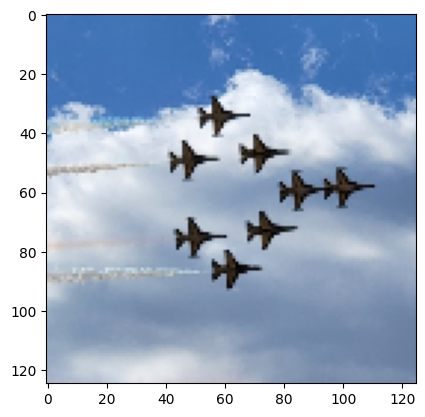

In [272]:
img_dir = "target_lr.png"

lr_img = cv2.imread(img_dir)

print(type(lr_img))

plt.imshow(cv2.cvtColor(lr_img, cv2.COLOR_BGR2RGB))
plt.show()

**2. Create an `np.ndarray` That Is 4 Times Larger**  

- Create an empty **`np.ndarray`** using **`np.zeros((width, height, channels))`**.  

- Increase the **width** and **height** of the image by a factor of **4**, while maintaining the number of **3 channels** (B, G, R).  

- The new **`np.ndarray`** will have **4 times the size** of the original image, but with the same number of color channels.  


In [273]:
w, h, c = lr_img.shape
print(f"Original image shape: {w}, {h}, {c}")

sr_w, sr_h, sr_c = 4 * w, 4 * h, c
bicubic_sr_img = np.zeros((sr_w, sr_h, sr_c), dtype=np.uint8)
print(f"Resized image shape: {bicubic_sr_img.shape}")

Original image shape: 125, 125, 3
Resized image shape: (500, 500, 3)


**3. Calculate the Width and Height Ratio Between `lr_img` and `sr_img`**  

- Calculate the scaling factors for the width and height.  
- The scaling factors are determined by dividing the width and height of **`sr_img`** by the corresponding dimensions of **`lr_img`**.  
  - **Scaling Factor for Width**:  
    $$
    s_x = \frac{\text{width of } sr\_img}{\text{width of } lr\_img}
    $$  
  - **Scaling Factor for Height**:  
    $$
    s_y = \frac{\text{height of } sr\_img}{\text{height of } lr\_img}
    $$  
- These scaling factors will be used to map coordinates from **`sr_img`** to **`lr_img`**.  


In [274]:
# =========================<your code starts here>========================
scale_x = w / sr_w
scale_y = h / sr_h
# =========================<your code ends here>==========================

**4. Perform Horizontal and Vertical Interpolation for All Coordinates \((i, j)\) in `sr_img`**  

- For each pixel \((i, j)\) in **`sr_img`**, calculate its corresponding **(x, y)** coordinates in **`lr_img`** using the scaling factors.  

- Use **horizontal linear interpolation** to compute pixel values between neighboring pixels:
  - Interpolate between the left and right pixels for the horizontal direction.  

- Use **vertical linear interpolation** to compute pixel values between the interpolated values from the horizontal interpolation:  
  - Interpolate between the top and bottom pixels for the vertical direction.  

- This process fills in the pixel values for **`sr_img`** based on the **`lr_img`**.  


In [275]:
# =========================<your code starts here>========================
# Due to notation, `i` represents the height direction, and `j` represents the width direction.
for i in range(sr_h):
    for j in range(sr_w):
        
        # Compute the virtual coordinate (x, y) in `lr_img` corresponding to (i, j)
        x = i * scale_x  # This is a float
        y = j * scale_y  # This is a float

        # Compute the four actual coordinates surrounding (x, y) in `lr_img`
        x0 = int(x)  # The actual coordinate above x (integer)
        y0 = int(y)  # The actual coordinate to the left of y (integer)

        # Use `min` to ensure the coordinates remain within the bounds of `lr_img`
        x1 = min(x0 + 1, w - 1)  # The actual coordinate below x
        y1 = min(y0 + 1, h - 1)  # The actual coordinate to the right of y

        # Compute the distances between the actual pixels and the virtual pixel (x, y)
        dx = x - x0
        dy = y - y0 

        # Perform linear interpolation between (y0, x0) and (y0, x1)
        top = (1 - dx) * lr_img[y0, x0] + dx * lr_img[y0, x1]

        # Perform linear interpolation between (y1, x0) and (y1, x1)
        bottom = (1 - dx) * lr_img[y1, x0] + dx * lr_img[y1, x1]

        # Perform linear interpolation between top and bottom values
        pixel_value = (1 - dy) * top + dy * bottom

        bicubic_sr_img[j, i] = pixel_value
# =========================<your code ends here>==========================

**5. Display `lr_img` and `sr_img` Results Using Matplotlib**  

- Use **`matplotlib`** to visualize both the low-resolution image (**`lr_img`**) and the super-resolution image (**`sr_img`**).  

- Display them side by side in a single figure to compare the results.  

- Use **`plt.subplot()`** to place **`lr_img`** and **`sr_img`** in separate subplots within the same figure.  

- Convert the image color format from **BGR to RGB** using **`cv2.cvtColor()`** before displaying with **`matplotlib`**.  


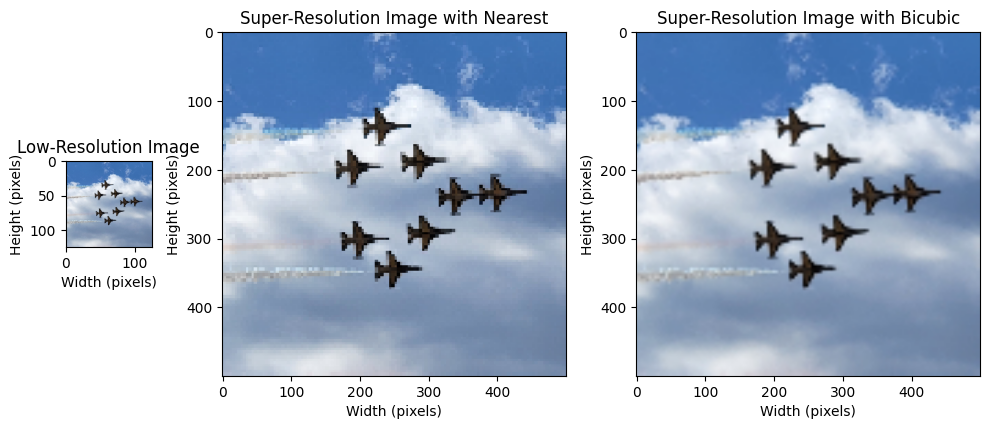

In [276]:
lr_img_height, lr_img_width = 125, 125
sr_img_height, sr_img_width = 500, 500

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[lr_img_width, sr_img_width, sr_img_width])

ax1 = fig.add_subplot(gs[0])
ax1.imshow(cv2.cvtColor(lr_img, cv2.COLOR_BGR2RGB))
ax1.set_title("Low-Resolution Image")
ax1.set_xlabel("Width (pixels)")
ax1.set_ylabel("Height (pixels)")
ax1.set_aspect('equal')

ax2 = fig.add_subplot(gs[1])
ax2.imshow(cv2.cvtColor(nearest_sr_img, cv2.COLOR_BGR2RGB))
ax2.set_title("Super-Resolution Image with Nearest")
ax2.set_xlabel("Width (pixels)")
ax2.set_ylabel("Height (pixels)")
ax2.set_aspect('equal')

ax3 = fig.add_subplot(gs[2])
ax3.imshow(cv2.cvtColor(bicubic_sr_img, cv2.COLOR_BGR2RGB))
ax3.set_title("Super-Resolution Image with Bicubic")
ax3.set_xlabel("Width (pixels)")
ax3.set_ylabel("Height (pixels)")
ax3.set_aspect('equal')

plt.tight_layout()
plt.show()

<br><br>

# **Exercise 4: Implementing an MSE Calculator**  
---
**MSE (Mean Squared Error) performs the following operations:**  

1. **Subtract the pixel values** of the two input images.  
   - For each corresponding pixel in the two images, compute the difference in their pixel values.  

2. **Compute the mean of the squared differences.**  
   - Square each difference computed in step 1.  
   - Calculate the average of these squared differences to obtain the Mean Squared Error.  


**1. Create a Function to Calculate MSE**  

- Define a function that takes two images as input (in `np.ndarray` format).  

- For each pixel in the images, calculate the difference between the corresponding pixel values.  

- Square each difference and calculate the mean of these squared differences to compute the MSE.  


In [277]:
def MSE(img1, img2):
    # =========================<your code starts here>========================
    difference = img1 - img2
    square = difference ** 2
    mse = np.mean(square)
    # =========================<your code ends here>==========================
    return mse

**2. Display Pairs of (img_hr, nearest_sr), (img_hr, bicubic_sr), and (img_hr, real-esrgan_sr) Using Matplotlib**  

- Use **`matplotlib`** to display the high-resolution image (**`img_hr`**) alongside three super-resolution results: **`nearest_sr`**, **`bicubic_sr`**, and **`real_esrgan_sr`**.  

- Display each pair of images side by side for easy comparison.  

- Use **`plt.subplot()`** to arrange the images in a grid layout within the figure.  

- Convert each image from **BGR to RGB** using **`cv2.cvtColor()`** before displaying with **`matplotlib`**.  


In [278]:
dir_img_hr = "target_hr.png"
dir_img_real_esrgan = "target_sr.png"

img_hr = cv2.imread(dir_img_hr)
real_esrgan_sr_image = cv2.imread(dir_img_real_esrgan)

In [279]:
def plot_two_images(hr_img, sr_img):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1) 
    plt.title("High-Resolution Image")
    plt.imshow(cv2.cvtColor(hr_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Super-Resolution Image")
    plt.imshow(cv2.cvtColor(sr_img, cv2.COLOR_BGR2RGB)) 
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

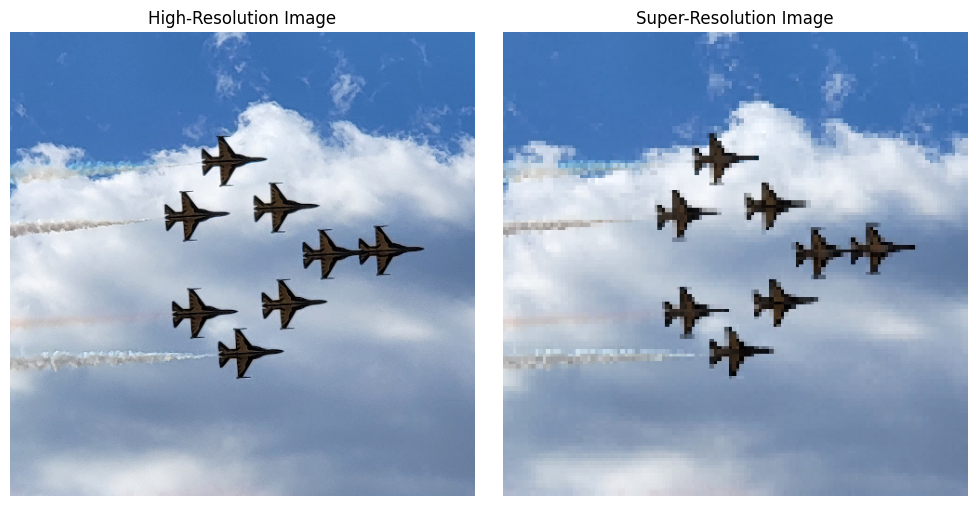

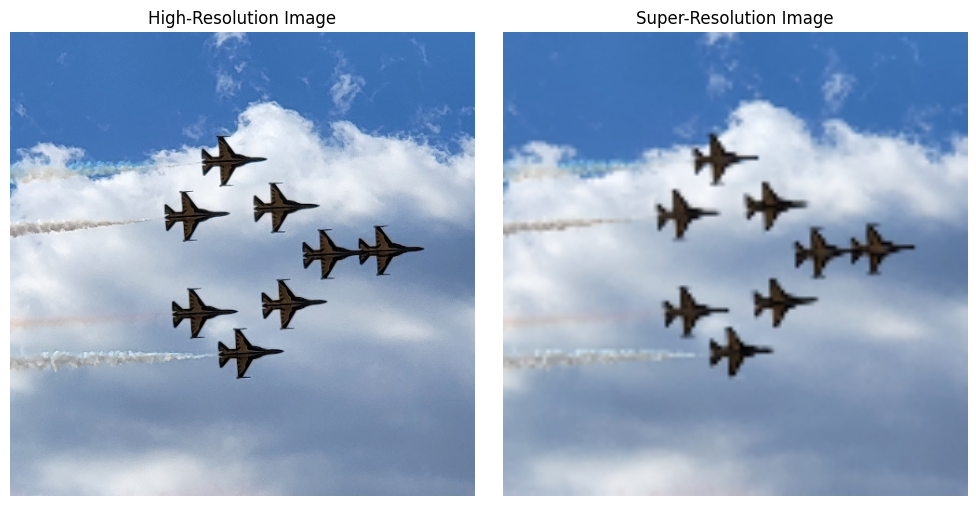

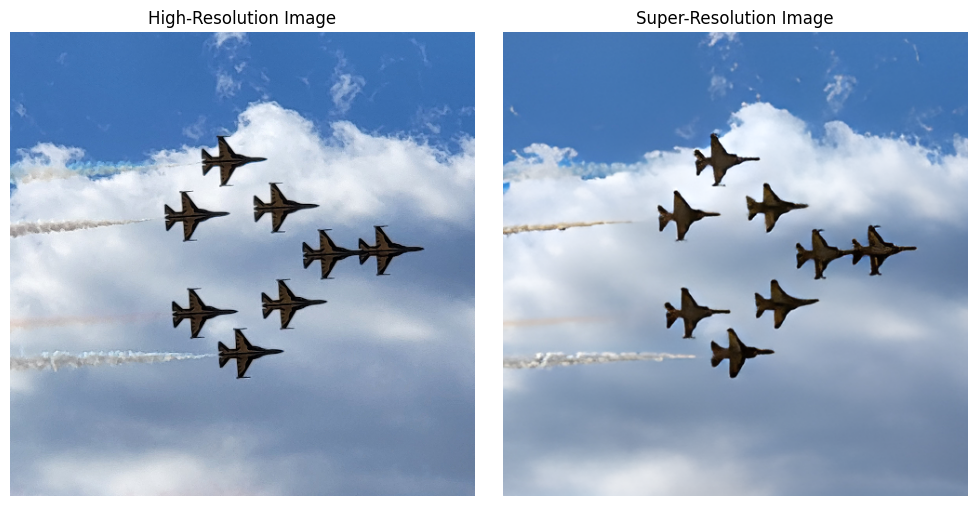

In [280]:
plot_two_images(img_hr, nearest_sr_img)
plot_two_images(img_hr, bicubic_sr_img)
plot_two_images(img_hr, real_esrgan_sr_image)

**3. Calculate the MSE Error for the Three Image Pairs**  

- For each image pair (**`img_hr`, `nearest_sr`**), (**`img_hr`, `bicubic_sr`**), and (**`img_hr`, `real_esrgan_sr`**), compute the **Mean Squared Error (MSE)**.  

- Use the **MSE function** defined earlier to calculate the error between each pair.  

- Display the MSE for each pair to compare the performance of the different super-resolution methods.  


In [281]:
print(f"HR ~ nearest : {MSE(img_hr, nearest_sr_img)}")
print(f"HR ~ bicubic : {MSE(img_hr, bicubic_sr_img)}")
print(f"HR ~ real-esrgan : {MSE(img_hr, real_esrgan_sr_image)}")

HR ~ nearest : 20.060170666666668
HR ~ bicubic : 19.641948
HR ~ real-esrgan : 24.154077333333333


<br><br>

**4. Calculate MSE in the Y Channel**  

There are two widely used color spaces: **RGB** and **YCbCr**.  

- **RGB** represents the intensity of **Red, Green**, and **Blue** channels.  
- **YCbCr** separates **Luminance (Y)** and **Chrominance (Cb, Cr)**, focusing on brightness and color information separately.  

Humans are generally more sensitive to brightness (**luminance**) than to color information.  
Therefore, for a more meaningful metric evaluation, the **MSE calculation** should be performed in the **Y channel of the YCbCr color space**, instead of the RGB space.  



**RGB to YCbCr**  

In the conversion from **RGB** to **YCbCr**, the formula for computing the **Y channel** (luminance) is as follows:  

$$
Y = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B
$$

Using this formula, we can create a function that calculates the **Y channel** from RGB values. This function will extract the luminance component from the RGB image, which will be useful for MSE calculation in the YCbCr color space.  


In [282]:
def RGB_to_Y(img):
    h, w, _ = img.shape
    y_channel = np.ndarray((h, w, 1))
    
    # =========================<your code starts here>========================
    for i in range(h):
        for j in range(w):
            b, g, r = img[i, j]
            y_channel[i, j] = 0.299 * r + 0.587 * g + 0.114 * b
    # =========================<your code ends here>==========================
    
    return y_channel

**5. Extract the Y Channel from the Image and Calculate MSE**  

- Extract the **Y channel** (luminance) from the image.  

- Use the extracted **Y channel** to compute the **Mean Squared Error (MSE)** between the high-resolution image (**`img_hr`**) and the super-resolution image (**`sr_img`**).  

- This step ensures the MSE is calculated based on the luminance component, which better reflects perceptual image quality.  


In [283]:
y_hr = RGB_to_Y(img_hr)
y_sr_nearest = RGB_to_Y(nearest_sr_img)
y_sr_bicubic = RGB_to_Y(bicubic_sr_img)
y_sr_real_esrgan = RGB_to_Y(real_esrgan_sr_image)

print(f"HR ~ nearest : {MSE(y_hr, y_sr_nearest)}")
print(f"HR ~ bicubic : {MSE(y_hr, y_sr_bicubic)}")
print(f"HR ~ real-esrgan : {MSE(y_hr, y_sr_real_esrgan)}")

HR ~ nearest : 281.61625314173193
HR ~ bicubic : 191.18509627235997
HR ~ real-esrgan : 97.703523776088


# Great job!  
---

In [288]:
import os
def save_numbers_to_txt(numbers, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    for i, number in enumerate(numbers):
        with open(os.path.join(output_folder, f"{i+1}.txt"), 'w') as f:
            f.write(str(number))

numbers = [6, 4, 2, 2, 4, 
           5, 2, 5, 5, 2, 
           2, 2, 7, 3, 5, 
           7, 2, 2, 5, 4, 
           3, 7, 7, 4, 2, 
           2, 5, 7, 5, 2, 
           3, 4, 2, 2, 
           11, 6, 2, 2, 2, 
           5, 4, 2, 4, 2, 
           2, 3, 6, 5, 7, 
           3, 6, 3, 2, 2, 
           2, 5, 2, 5, 5, 
           3, 6, 6, 2, 6, 
           2, 3, 3, 2, 4, 
           4, 2, 2, 3, 10, 3, 4, 2, 5, 5, 4, 5, 4, 4, 7, 13, 11, 4, 5, 2, 9, 
           5, 7, 4, 5, 2, 2, 3, 5, 2, 2, 2, 2, 5, 4, 3, 2, 3, 2, 3, 2, 2, 5, 3, 2, 4, 2, 3, 2, 2, 7, 2, 
           5, 4, 2, 6, 2, 5, 4, 5, 3, 2, 2, 2, 6, 12, 4, 2, 6, 2, 5, 6, 2, 2, 4, 2, 3, 3, 2]
save_numbers_to_txt(numbers, "input")